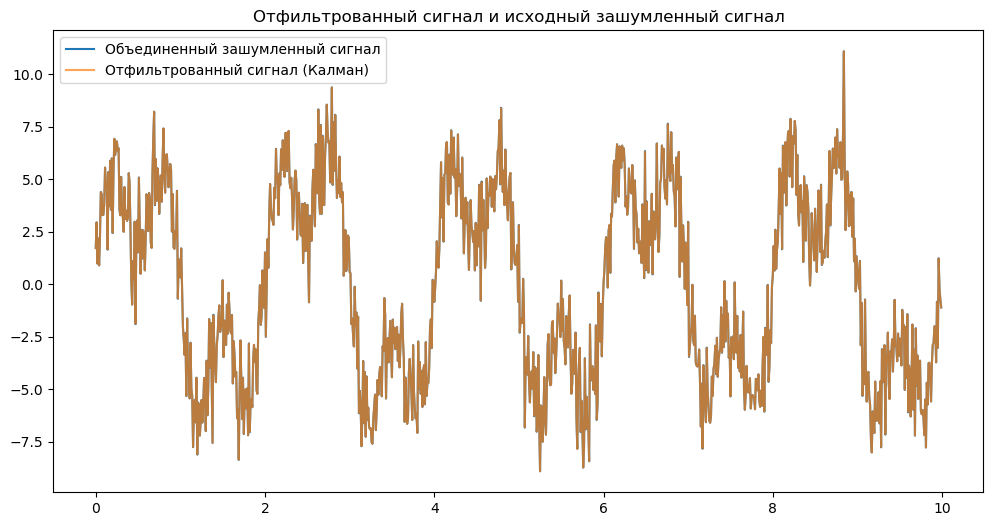

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Создание двух синусоидальных сигналов
t = np.arange(0, 10, 0.01)
signal1 = 5 * np.sin(2 * np.pi * 0.5 * t)
signal2 = 3 * np.sin(2 * np.pi * 1.5 * t)

# Добавление шума к сигналам
noise1 = np.random.normal(0, 1, len(t))
noise2 = np.random.normal(0, 1, len(t))
noisy_signal1 = signal1 + noise1
noisy_signal2 = signal2 + noise2

# Объединение двух сигналов
combined_noisy_signal = noisy_signal1 + noisy_signal2

# Фильтрация сигнала с помощью фильтра Калмана
def kalman_filter(measurements, initial_state=0, process_variance=0.00001, measurement_variance=0.01):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([initial_state, 0])
    kf.P *= process_variance
    kf.R *= measurement_variance
    kf.F = np.array([[1., 1.], [0., 1.]])
    kf.H = np.array([[1., 0.]])

    filtered_states = []
    for measurement in measurements:
        kf.predict()
        kf.update(measurement)
        filtered_states.append(kf.x[0])

    return np.array(filtered_states)

initial_state_guess = 0
filtered_states = kalman_filter(combined_noisy_signal, initial_state_guess)

# Вывод графиков
plt.figure(figsize=(12, 6))
plt.plot(t, combined_noisy_signal, label='Объединенный зашумленный сигнал')
plt.plot(t, filtered_states, label='Отфильтрованный сигнал (Калман)', alpha=0.7)
plt.title('Отфильтрованный сигнал и исходный зашумленный сигнал')
plt.legend()
plt.show()

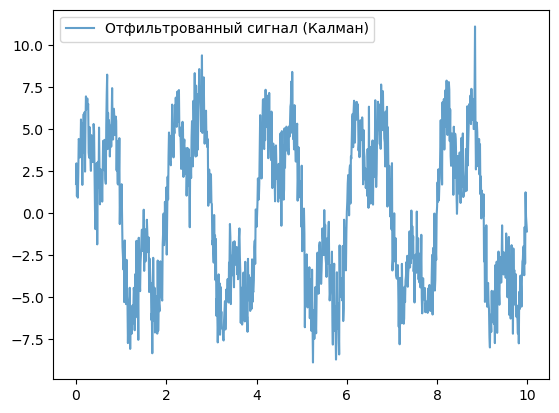

In [49]:
plt.plot(t, filtered_states, label='Отфильтрованный сигнал (Калман)', alpha=0.7)
plt.legend()
plt.show()

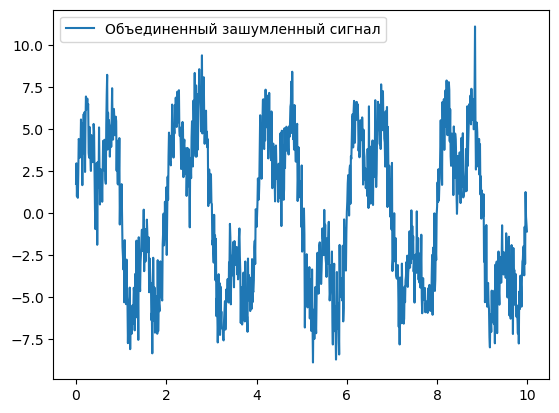

In [50]:
plt.plot(t, combined_noisy_signal, label='Объединенный зашумленный сигнал')
plt.legend()
plt.show()